# 1-Introduction

Ferdiansyah Ersatiyo

FTDS -RMT- 020


## Brief Explanation

PT Bank Danamon Indonesia Tbk (Danamon) was established in 1956 and has since grown to become one of the largest financial institutions in Indonesia, guided by the company's vision of "We Care and Assist Millions of People in Achieving Prosperity". Danamon has also developed comprehensive digital services, including SMS banking, internet banking, and mobile banking for both individual and business customers, with features and capabilities continuously enhanced to meet the demands of banking service users in the digital era that increasingly prioritize ease and speed of transactions.

## Objective

Conducting sentiment analysis on the Danamon mobile banking platform to assess customer feedback, pinpoint areas of concern, and determine enhancement opportunities for the application.

## Dataset

data collected by doing scrapping in google play store reviews and uploaded the result to github for easy use.
data also uploaded to kaggle for others to try

dataset [here](https://www.kaggle.com/datasets/ferdiers/danamon-mobile-banking-reviewsd-bank-pro)

# 2-Import Library

In [1]:
!pip install pysastrawi
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.0 MB/s eta 0:00:00


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import shutil

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import pipeline

from helper import *
import warnings

from gensim import corpora, models
from gensim.models import Phrases
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.corpora import MmCorpus
from gensim.corpora.dictionary import Dictionary
from numpy import array


warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3-Data Loading

In [3]:
#load data to df
df = pd.read_csv('https://raw.githubusercontent.com/FerdiErs/CSV_source/main/Danamon%20Mobile%20Banking%20Reviews(D-Bank%20Pro).csv')

In [4]:
#show 5 top data
df.head()

Unnamed: 0                              reviewId                userName  \
0           0  9387accd-b963-4777-9fb9-a63d2acf6127             Lanang Dauh   
1           1  9fe3fbae-b857-40b4-83de-e0ae3dbcf51e        Syahrul borahima   
2           2  fafe9f94-98d6-4c3f-9126-c02e7b54c52a  Muhammad faisal Rahman   
3           3  6d5f8e5c-29d2-4b9a-88d1-3728386a318c              Rifai Nike   
4           4  6aab0fbc-10da-48e4-8c5e-5bb82e4969af                 Akun ML   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AAcHTt...   
1  https://play-lh.googleusercontent.com/a-/AD_cM...   
2  https://play-lh.googleusercontent.com/a/AAcHTt...   
3  https://play-lh.googleusercontent.com/a-/AD_cM...   
4  https://play-lh.googleusercontent.com/a/AAcHTt...   

                                             content  score  thumbsUpCount  \
0  Bagus bisa membantu masyarakat , khususnya ttg...      5              0   
1                                    Sangat membantu      5              0   
2  Ini gimana sih? Kwkwkwk, udah daftar dan udah ...      3              0   
3                                                 Ok      5              0   
4  Knpa y kemaren ada potongan lagi dari prima Ba...      1              0   

  reviewCreatedVersion                   at  \
0                1.4.1  2023-08-08 23:55:24   
1                1.4.1  2023-08-08 11:59:36   
2                1.4.1  2023-08-08 10:00:32   
3                1.4.1  2023-08-07 20:33:33   
4                  NaN  2023-08-07 16:48:18   

                                        replyContent            repliedAt  \
0  Hello Bapak/Ibu, terima kasih atas ulasannya. ...  2023-08-09 12:58:03   
1  Hello Bapak/Ibu, terima kasih atas ulasannya. ...  2023-08-08 13:16:36   
2  Hello Bapak/Ibu, maaf atas ketidaknyamanannya....  2023-08-08 13:17:40   
3  Hello Bapak/Ibu, terima kasih atas ulasannya. ...  2023-08-08 13:16:57   
4  Hello Bapak/Ibu, maaf atas ketidaknyamanannya....  2023-08-08 13:19:10   

  appVersion  
0      1.4.1  
1      1.4.1  
2      1.4.1  
3      1.4.1  
4        NaN

In [5]:
#show 5 bottom data
df.tail()

Unnamed: 0                              reviewId               userName  \
6648        6648  2d6fe3d4-8298-415c-9a77-5e026ba70668       Agustiono Afandi   
6649        6649  1f5c9d1b-557b-4823-bf8d-bf95860552ca          Arif Abdillah   
6650        6650  7ad94848-9742-49de-96d7-73f61ab00f62       Harmadi Kenangan   
6651        6651  ed773cc8-31e8-433e-ba5d-302f90277eb2  NASIRUN NAJIB HARAHAP   
6652        6652  71b1d5b6-74a6-4656-ab2d-9ea83d0c99cd           azhel Shanum   

                                              userImage  \
6648  https://play-lh.googleusercontent.com/a-/AD_cM...   
6649  https://play-lh.googleusercontent.com/a-/AD_cM...   
6650  https://play-lh.googleusercontent.com/a-/AD_cM...   
6651  https://play-lh.googleusercontent.com/a-/AD_cM...   
6652  https://play-lh.googleusercontent.com/a/AAcHTt...   

                                                content  score  thumbsUpCount  \
6648  Saya belum bisa aktivasi via kartu debit. Sela...      4             12   
6649  Aplikasi Digital Banking yang lengkap dan user...      5              5   
6650                                                 Ok      5              3   
6651                                                 OK      5              4   
6652                                      Lebih komplit      5              2   

     reviewCreatedVersion                   at  \
6648                1.1.1  2021-05-24 01:34:43   
6649                1.1.0  2021-05-19 22:22:29   
6650                  NaN  2021-05-17 04:30:07   
6651                  NaN  2021-04-19 13:38:27   
6652             1.1.0.10  2021-03-31 05:45:25   

                                           replyContent            repliedAt  \
6648  Hello Bapak/Ibu, Selamat Datang di D-Bank Pro ...  2021-06-26 05:30:15   
6649  Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...  2021-06-26 05:23:12   
6650  Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...  2021-06-26 05:23:23   
6651  Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...  2021-06-26 05:23:43   
6652  Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...  2021-06-26 05:23:54   

     appVersion  
6648      1.1.1  
6649      1.1.0  
6650        NaN  
6651        NaN  
6652   1.1.0.10

## Duplication Data

In [6]:
#copy data
dup = df.copy()

# 4-Exploratory Data Analysis

## Checking the data

In [7]:
dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6653 entries, 0 to 6652
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6653 non-null   int64 
 1   reviewId              6653 non-null   object
 2   userName              6653 non-null   object
 3   userImage             6653 non-null   object
 4   content               6653 non-null   object
 5   score                 6653 non-null   int64 
 6   thumbsUpCount         6653 non-null   int64 
 7   reviewCreatedVersion  5605 non-null   object
 8   at                    6653 non-null   object
 9   replyContent          6649 non-null   object
 10  repliedAt             6649 non-null   object
 11  appVersion            5605 non-null   object
dtypes: int64(3), object(9)
memory usage: 623.8+ KB


In [8]:
dup.describe()

Unnamed: 0        score  thumbsUpCount
count  6653.000000  6653.000000    6653.000000
mean   3326.000000     3.040884       0.572524
std    1920.700003     1.827781       3.513573
min       0.000000     1.000000       0.000000
25%    1663.000000     1.000000       0.000000
50%    3326.000000     3.000000       0.000000
75%    4989.000000     5.000000       0.000000
max    6652.000000     5.000000     114.000000

In [9]:
dup.duplicated().sum()

0

## Rating Distribution

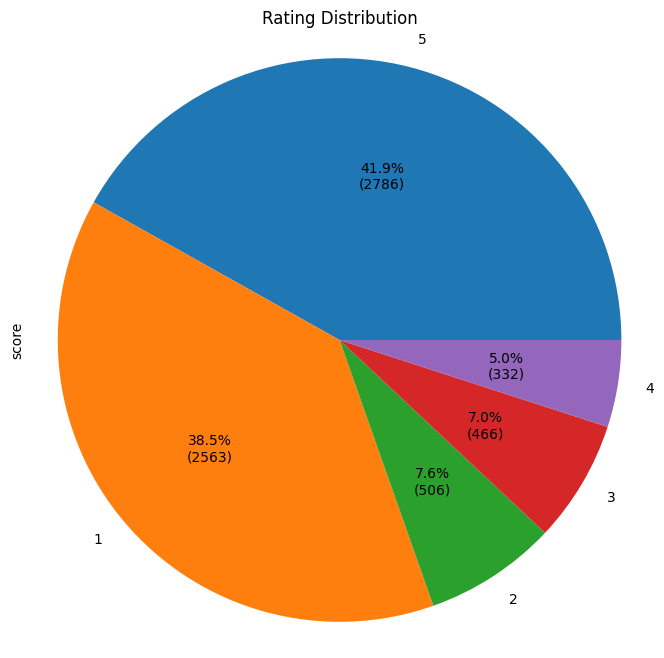

In [10]:
rating_count = dup['score'].value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.figure(figsize=(8, 8))
plt.title('Rating Distribution')
rating_count.plot.pie(subplots=True, autopct=autopct_format(rating_count))
plt.axis('equal')
plt.show()

our application have highest rating in 5 stars and then 1 stars 2,3,4 is very small amount this can tell that either our customer like our application very much or they hate it. We can do further examination for the one with 1 stars, usually 1 stars contains complaint hate or disappoiment of our application

## Review Likes

<Axes: xlabel='thumbsUpCount', ylabel='Count'>

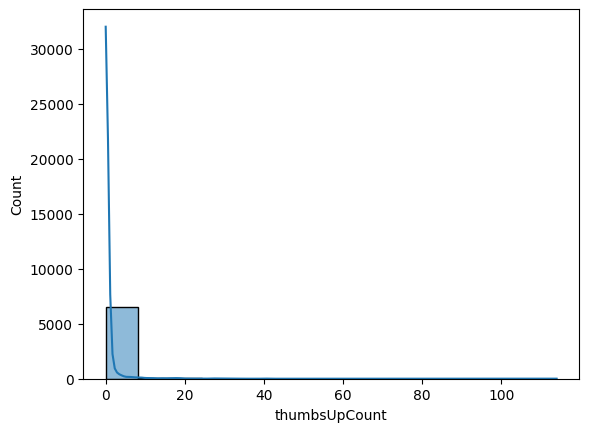

In [11]:
# seeing distribution of data thumbs up
sns.histplot(dup, x='thumbsUpCount',kde =True)

Thumbs Up mean that the review is liked by other users, based on this visualization we can say that most of the reviews get like, the review with 0-10 likes is the most in this dataset but there is also a review that get 100 more likes

## App version to reviews

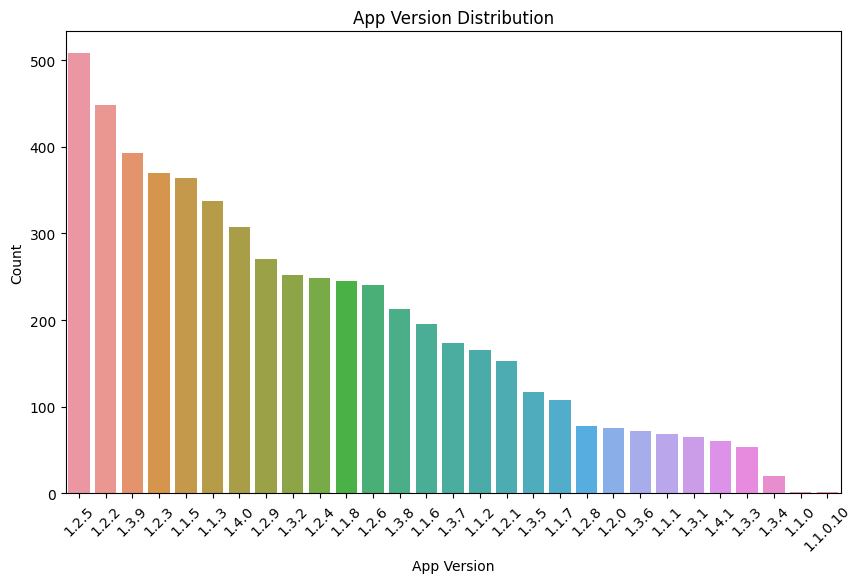

In [12]:
value_counts = dup['appVersion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('App Version Distribution')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The version of application danamon mobile banking had many review by customers in the app version 1.2.5 but now its already on updated version

## Review by Year

In [13]:
# Convert the column to datetime
dup['at'] = pd.to_datetime(dup['at'])
dup['repliedAt'] = pd.to_datetime(dup['repliedAt'])

# Extract the year from the 'datetime' column
dup['year_review'] = dup['at'].dt.year
dup['year_replied'] = dup['repliedAt'].dt.year

dup.head()

Unnamed: 0                              reviewId                userName  \
0           0  9387accd-b963-4777-9fb9-a63d2acf6127             Lanang Dauh   
1           1  9fe3fbae-b857-40b4-83de-e0ae3dbcf51e        Syahrul borahima   
2           2  fafe9f94-98d6-4c3f-9126-c02e7b54c52a  Muhammad faisal Rahman   
3           3  6d5f8e5c-29d2-4b9a-88d1-3728386a318c              Rifai Nike   
4           4  6aab0fbc-10da-48e4-8c5e-5bb82e4969af                 Akun ML   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AAcHTt...   
1  https://play-lh.googleusercontent.com/a-/AD_cM...   
2  https://play-lh.googleusercontent.com/a/AAcHTt...   
3  https://play-lh.googleusercontent.com/a-/AD_cM...   
4  https://play-lh.googleusercontent.com/a/AAcHTt...   

                                             content  score  thumbsUpCount  \
0  Bagus bisa membantu masyarakat , khususnya ttg...      5              0   
1                                    Sangat membantu      5              0   
2  Ini gimana sih? Kwkwkwk, udah daftar dan udah ...      3              0   
3                                                 Ok      5              0   
4  Knpa y kemaren ada potongan lagi dari prima Ba...      1              0   

  reviewCreatedVersion                  at  \
0                1.4.1 2023-08-08 23:55:24   
1                1.4.1 2023-08-08 11:59:36   
2                1.4.1 2023-08-08 10:00:32   
3                1.4.1 2023-08-07 20:33:33   
4                  NaN 2023-08-07 16:48:18   

                                        replyContent           repliedAt  \
0  Hello Bapak/Ibu, terima kasih atas ulasannya. ... 2023-08-09 12:58:03   
1  Hello Bapak/Ibu, terima kasih atas ulasannya. ... 2023-08-08 13:16:36   
2  Hello Bapak/Ibu, maaf atas ketidaknyamanannya.... 2023-08-08 13:17:40   
3  Hello Bapak/Ibu, terima kasih atas ulasannya. ... 2023-08-08 13:16:57   
4  Hello Bapak/Ibu, maaf atas ketidaknyamanannya.... 2023-08-08 13:19:10   

  appVersion  year_review  year_replied  
0      1.4.1         2023        2023.0  
1      1.4.1         2023        2023.0  
2      1.4.1         2023        2023.0  
3      1.4.1         2023        2023.0  
4        NaN         2023        2023.0

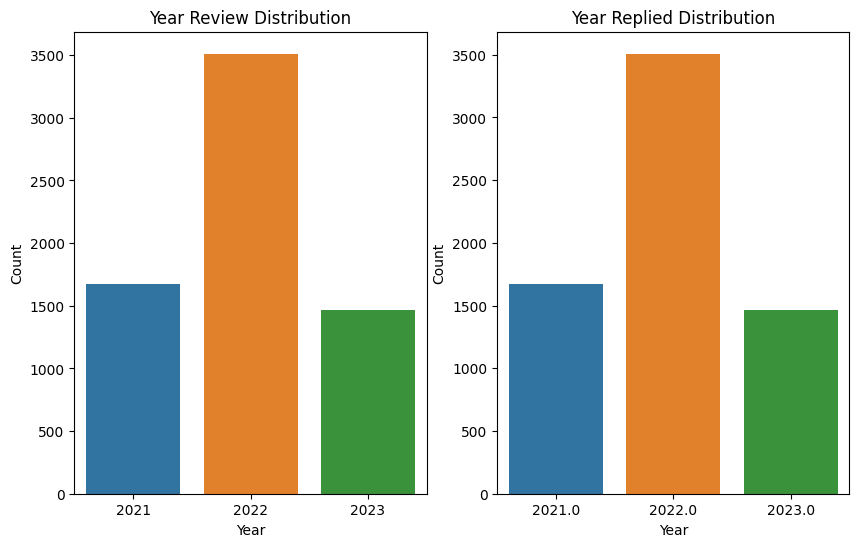

In [14]:
year_rev = dup['year_review'].value_counts()
year_rep = dup['year_replied'].value_counts()


plt.figure(figsize=(10, 6))
# year review
plt.subplot(1,2,1)
sns.barplot(x=year_rev.index, y=year_rev.values)
plt.title('Year Review Distribution')
plt.xlabel('Year')
plt.ylabel('Count')

#year replied
plt.subplot(1,2,2)
sns.barplot(x=year_rep.index, y=year_rep.values)
plt.title('Year Replied Distribution')
plt.xlabel('Year')
plt.ylabel('Count')


plt.show()

in 2022 the apps gotten so many reviews clossing to 3500 reviews almost double from 2021, because 2023 is still going there's a probability that the review this year will be higher than 2022. On the replied visualization we also can see that our developer replying to user reviews. This is a good customer service being done by the developer.  

## Visualize Common Word

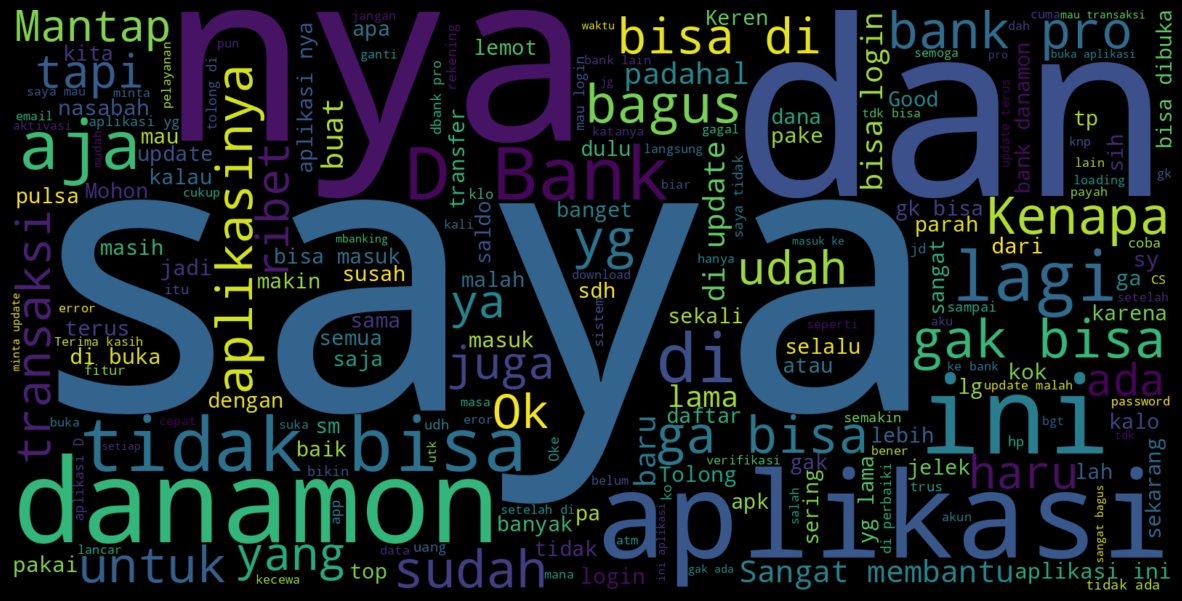

In [15]:
# see most common word in reviews data
text = " ".join(i for i in dup.content)
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure( figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

on this visualization we can see that Saya is the biggest word visualize, this means that the reviewer  reffers themself as 'saya' in the review

## EDA Insight

1. Our data have highest stars on 5, 1, 2, 3, 4
2. Our reviewers usually got likes between 1-10 but theres some reviews that got 100 more likes this means that the users review is related to other users
3. Version 1.2.5 got the most review then other version of the apps
4. 2022 is the year where our user give the most review of the apps
5. Common word that used by the reviewer are 'saya', 'aplikasi','Mantap'
6. The review doesnt mean its always goood review, it can be a bad review. So we need to do sentiment analysis to determined wether the review is good or bad

# 5-Preprocessing

Preprocessing steps :

1. Convert text to lowercase.
2. Remove punctuation.
3. Remove unnecessary characters.
4. Remove stopwords.
5. Stemming.

## Feature Selection

In [16]:
data = df.loc[:, ['content','score','appVersion']]

In [17]:
data

content  score appVersion
0     Bagus bisa membantu masyarakat , khususnya ttg...      5      1.4.1
1                                       Sangat membantu      5      1.4.1
2     Ini gimana sih? Kwkwkwk, udah daftar dan udah ...      3      1.4.1
3                                                    Ok      5      1.4.1
4     Knpa y kemaren ada potongan lagi dari prima Ba...      1        NaN
...                                                 ...    ...        ...
6648  Saya belum bisa aktivasi via kartu debit. Sela...      4      1.1.1
6649  Aplikasi Digital Banking yang lengkap dan user...      5      1.1.0
6650                                                 Ok      5        NaN
6651                                                 OK      5        NaN
6652                                      Lebih komplit      5   1.1.0.10

[6653 rows x 3 columns]

## Stemming and Stop Words

In [18]:
# Stemming using sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stopwords using nltk
stpwds_id = list(set(stopwords.words('indonesian')))

## Function to process the review

In [19]:
# Function to all review

def text_proses(teks):
  # lower text
  teks = teks.lower()

  # delete Mention
  teks = re.sub("@[A-Za-z0-9_]+", " ", teks)

  # delete Hashtag
  teks = re.sub("#[A-Za-z0-9_]+", " ", teks)

  # delete \n
  teks = re.sub(r"\\n", " ",teks)

  # delete Whitespace
  teks = teks.strip()

  # delete Link
  teks = re.sub(r"http\S+", " ", teks)
  teks = re.sub(r"www.\S+", " ", teks)

  # delete emoji etc
  teks = re.sub("[^A-Za-z\s']", " ", teks)

  return teks

In [20]:
# apply function using lambda x

data['content_process'] = data['content'].apply(lambda x: text_proses(x))
data.tail()

content  score appVersion  \
6648  Saya belum bisa aktivasi via kartu debit. Sela...      4      1.1.1   
6649  Aplikasi Digital Banking yang lengkap dan user...      5      1.1.0   
6650                                                 Ok      5        NaN   
6651                                                 OK      5        NaN   
6652                                      Lebih komplit      5   1.1.0.10   

                                        content_process  
6648  saya belum bisa aktivasi via kartu debit  sela...  
6649  aplikasi digital banking yang lengkap dan user...  
6650                                                 ok  
6651                                                 ok  
6652                                      lebih komplit

## Visualize Common Word after preprocessing

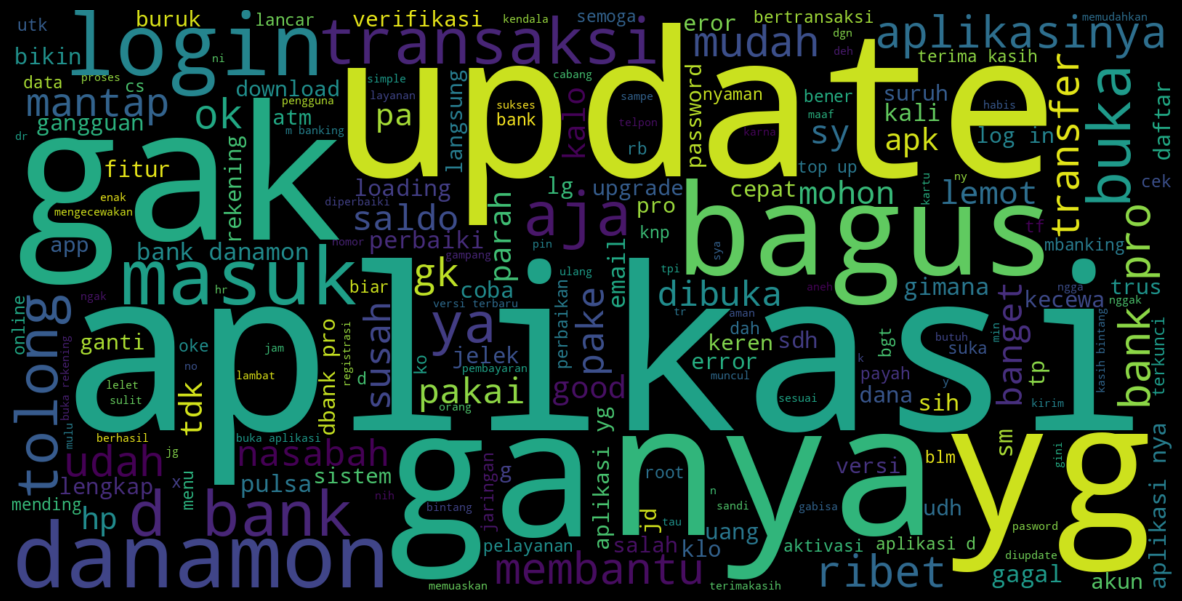

In [21]:
# see most common word in reviews data after preprocessing
text = " ".join(i for i in data.content_process)
stopwords = list(set(stopwords.words('indonesian')))
wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords).generate(text)
plt.figure( figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 6-Sentiment Analysis

## Modelling

this data does not conntains any label or explanation so it will be quite hard to devide into positive,negative or neutral

users can give the apps 3 stars with a positive review but users also can give 3 stars with neutral reviews, but they also can give 3 stars with a negative reviews.

So in this case i think using pre trained model is the best solution to this dataset. Pretrained model that i will use is Roberta Indonesia by [Wilson Wongso](https://github.com/w11wo)

[Roberta Indonesia](https://huggingface.co/w11wo/indonesian-roberta-base-sentiment-classifier?text=bintang+1+deh) is Indonesian RoBERTa Base Sentiment Classifier is a sentiment-text-classification model based on the [RoBERTa model](https://arxiv.org/abs/1907.11692). The model was originally the pre-trained [Indonesian RoBERTa Base model](https://huggingface.co/flax-community/indonesian-roberta-base), which is then fine-tuned on [indonlu's](https://huggingface.co/datasets/indonlp/indonlu) SmSA dataset consisting of Indonesian comments and reviews.

Hugging Face's Trainer class from the Transformers library was used to train the model. PyTorch was used as the backend framework during training, but the model remains compatible with other frameworks nonetheless.

In [22]:
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


## Applying Model

In [23]:
#change data types into string
data['content_process'] = data['content_process'].astype('str')

# apllying model to all review
data['result'] = data['content_process'].apply(lambda x:nlp(x))

# split sentiment and probabillity from results
data['sentiment'] = data['result'].apply(lambda x :(x[0]['label']))
data['proba'] = data['result'].apply(lambda x :(x[0]['score']))

In [24]:
#show the first 10 data
data.head()

content  score appVersion  \
0  Bagus bisa membantu masyarakat , khususnya ttg...      5      1.4.1   
1                                    Sangat membantu      5      1.4.1   
2  Ini gimana sih? Kwkwkwk, udah daftar dan udah ...      3      1.4.1   
3                                                 Ok      5      1.4.1   
4  Knpa y kemaren ada potongan lagi dari prima Ba...      1        NaN   

                                     content_process  \
0  bagus bisa membantu masyarakat   khususnya ttg...   
1                                    sangat membantu   
2  ini gimana sih  kwkwkwk  udah daftar dan udah ...   
3                                                 ok   
4  knpa y kemaren ada potongan lagi dari prima ba...   

                                              result sentiment     proba  
0  [{'label': 'positive', 'score': 0.996625304222...  positive  0.996625  
1  [{'label': 'positive', 'score': 0.995917260646...  positive  0.995917  
2  [{'label': 'negative', 'score': 0.998039305210...  negative  0.998039  
3  [{'label': 'negative', 'score': 0.998392641544...  negative  0.998393  
4  [{'label': 'neutral', 'score': 0.9930198788642...   neutral  0.993020

## Evaluate Sentiment Analysis

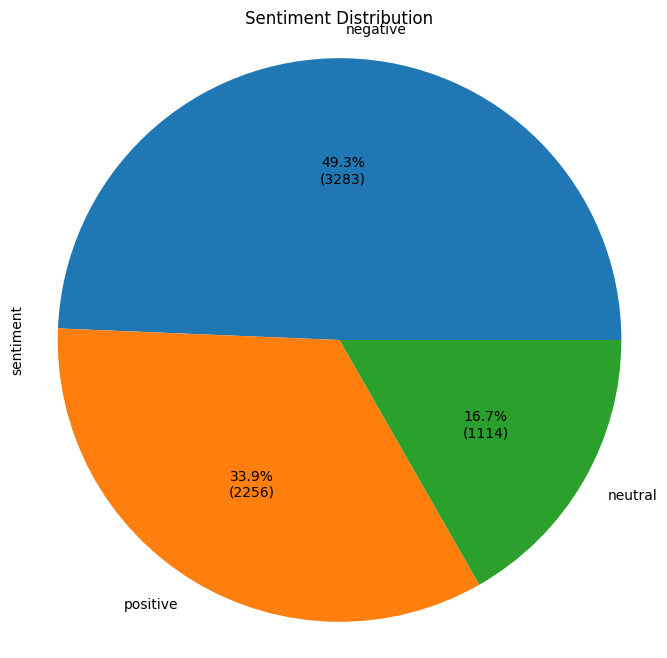

In [25]:
sen_count = data['sentiment'].value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.figure(figsize=(8, 8))
plt.title('Sentiment Distribution')
sen_count.plot.pie(subplots=True, autopct=autopct_format(sen_count))
plt.axis('equal')
plt.show()

In [26]:
# split dataframe into positive netral and negative section

posdf = data[(data.sentiment == "positive")]
netdf = data[(data.sentiment == "neutral")]
negdf = data[(data.sentiment == "negative")]

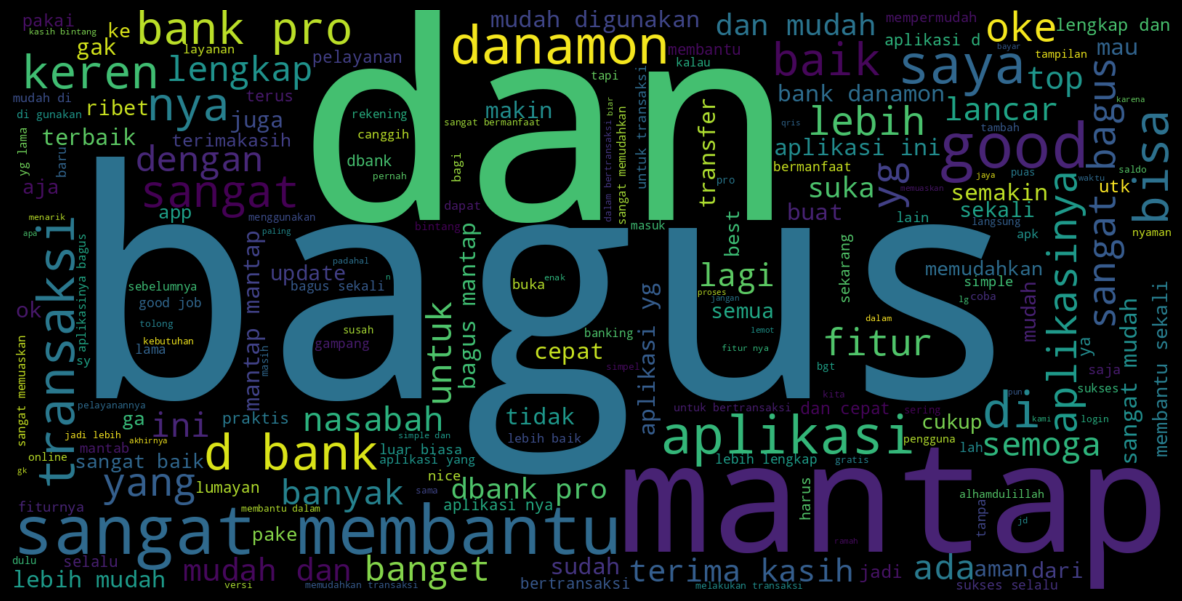

In [27]:
# see most common word in positive sentiment
text = " ".join(i for i in posdf.content_process)
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure( figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

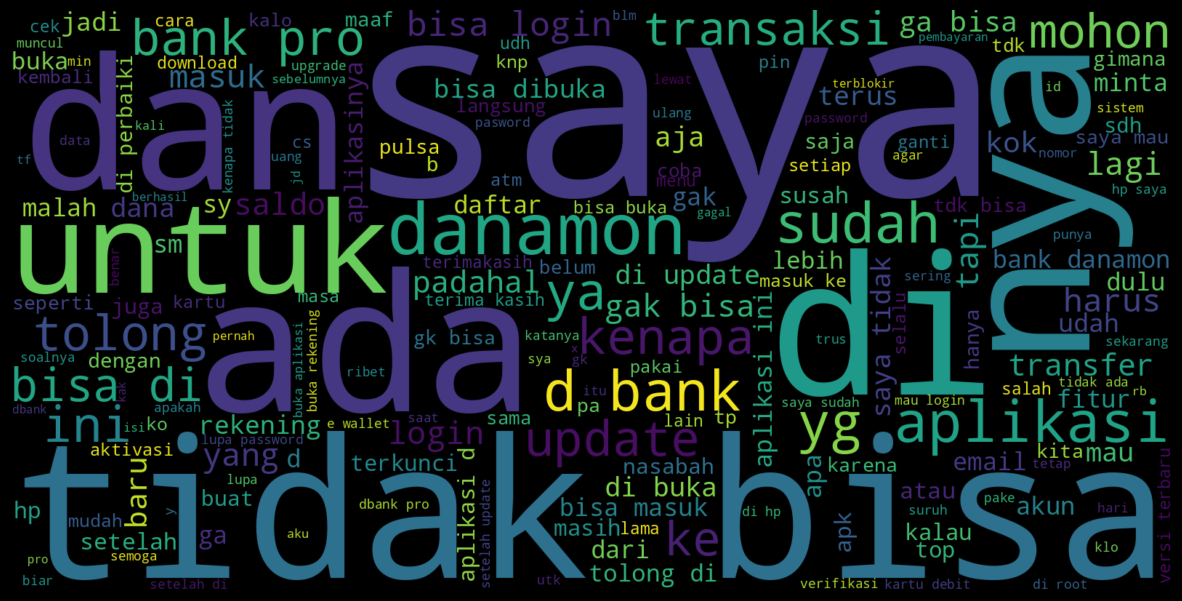

In [28]:
# see most common word in neutral sentiment
text = " ".join(i for i in netdf.content_process)
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure( figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

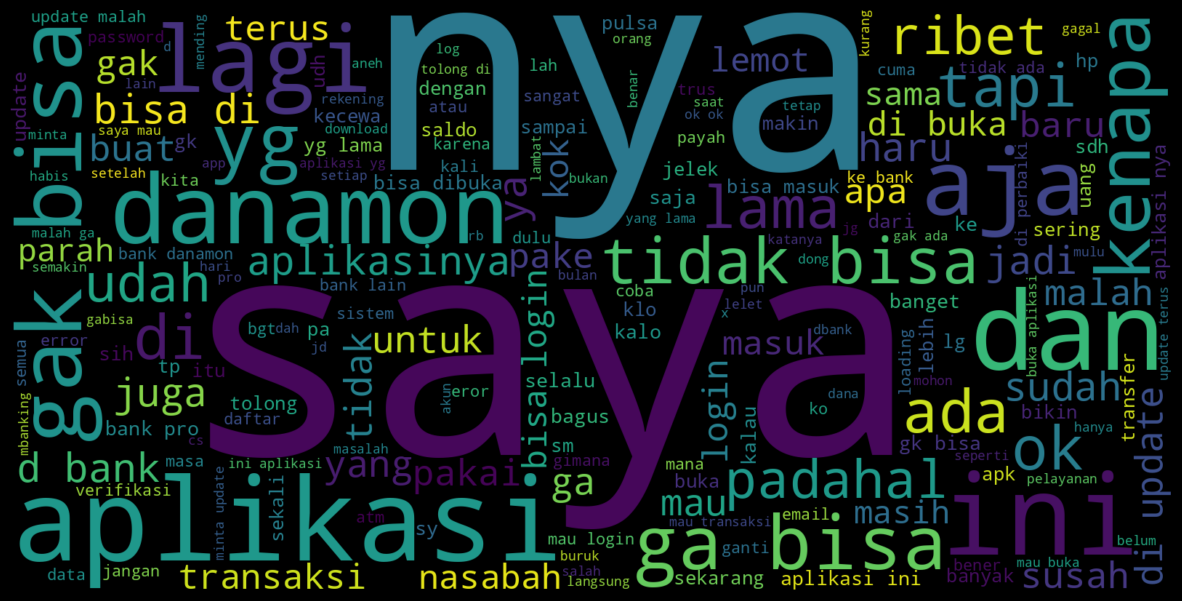

In [29]:
# see most common word in negative sentiment
text = " ".join(i for i in negdf.content_process)
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure( figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

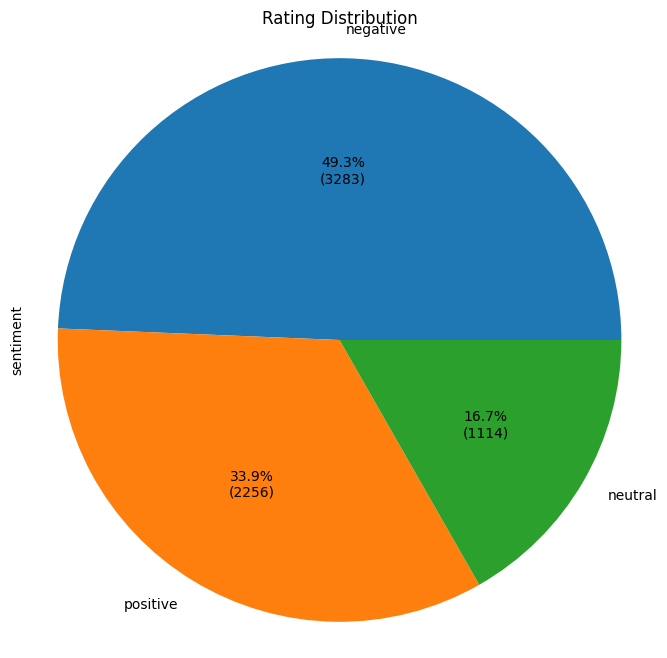

In [59]:
count_sent = data['sentiment'].value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.figure(figsize=(8, 8))
plt.title('Sentiment Distribution')
count_sent.plot.pie(subplots=True, autopct=autopct_format(count_sent))
plt.axis('equal')
plt.show()

In [30]:
# save the dataset into local
data.to_csv('sentiment review danamon mobile banking.csv')

## Sentiment Analysis Insight

Based on our modelling with Roberta Indonesia by [Wilson Wongso](https://github.com/w11wo) we sucsessfully seperated review into 3 cateegories, Positive,Negative and Neutral

Our data contains mostly negative sentiment this insight can bring a new prespective into our developer who created the mobile banking apps. But with only negative positive and neutral, we cannot told our developer on what to improve so we got positive sentiment or neutral.

Categorization or Topic segmentation became an answer to our question. we can determined whats topics in each sentiment so we can improve the topic on negative sentiment and we can also keep the topics from positive sentiment.

#  7- Categorization

Latent Dirichlet Allocation (LDA) is a probabilistic model used for topic modeling and segmentation in a collection of documents. It is widely used in natural language processing (NLP) and text mining to discover hidden topics within a large corpus of text data. LDA assumes that each document in the corpus is a mixture of various topics, and each topic is represented as a distribution of words.

Here's a breakdown of how LDA works and why it's used for topic segmentation:

**1. Basic Idea:**
LDA assumes that documents are generated through a two-step process:
- For each document, select a distribution of topics.
- For each word in the document, choose a topic from the distribution of topics and then select a word from the topic's distribution.

**2. Components of LDA:**
LDA involves several components:
- **Documents:** A collection of text documents that you want to analyze.
- **Topics:** Latent topics are hidden thematic patterns that represent the underlying structure in the documents.
- **Words:** The individual words in the documents.

**3. How LDA Works:**
LDA aims to reverse-engineer this process to uncover the latent topics and their distributions. Given a set of documents, LDA seeks to find the topics that are most likely to have generated the observed data. It does this by iteratively assigning words to topics and adjusting topic distributions to maximize the likelihood of the observed data.

**4. Use Cases and Benefits:**
LDA is particularly useful for topic segmentation in various ways:
- **Topic Discovery:** LDA can automatically discover the main topics present in a collection of documents without the need for human labeling.
- **Document Summarization:** Once topics are identified, you can use the most representative words from each topic to create summaries or descriptions of documents.
- **Content Recommendation:** LDA can aid in content recommendation systems by identifying relevant topics for a given user based on their preferences.
- **Information Retrieval:** LDA can improve search and retrieval systems by allowing more nuanced queries based on the discovered topics.
- **Market Research:** LDA can segment customer feedback, reviews, and comments to extract insights about customer preferences and sentiments.
- **Content Organization:** LDA can help organize large volumes of text data into cohesive clusters based on their topic distributions.

In the context of topic segmentation, LDA helps in automatically grouping similar documents together under the same topic, allowing you to analyze and understand the content of a large corpus more effectively. It's a valuable tool for organizing and extracting meaningful information from unstructured text data, making it easier to navigate and process vast amounts of information.

## Loading data

In [31]:
df_sen= pd.read_csv('https://raw.githubusercontent.com/FerdiErs/CSV_source/main/sentiment%20review%20danamon%20mobile%20banking.csv') # loading the data from sentiment analysis that already uploded to github for easy use
df_sen.head()

Unnamed: 0                                            content  score  \
0           0  Bagus bisa membantu masyarakat , khususnya ttg...      5   
1           1                                    Sangat membantu      5   
2           2  Ini gimana sih? Kwkwkwk, udah daftar dan udah ...      3   
3           3                                                 Ok      5   
4           4  Knpa y kemaren ada potongan lagi dari prima Ba...      1   

  appVersion                                    content_process  \
0      1.4.1  bagus bisa membantu masyarakat   khususnya ttg...   
1      1.4.1                                    sangat membantu   
2      1.4.1  ini gimana sih  kwkwkwk  udah daftar dan udah ...   
3      1.4.1                                                 ok   
4        NaN  knpa y kemaren ada potongan lagi dari prima ba...   

                                              result sentiment     proba  
0  [{'label': 'positive', 'score': 0.996625304222...  positive  0.996625  
1  [{'label': 'positive', 'score': 0.995917260646...  positive  0.995917  
2  [{'label': 'negative', 'score': 0.998039305210...  negative  0.998039  
3  [{'label': 'negative', 'score': 0.998392641544...  negative  0.998393  
4  [{'label': 'neutral', 'score': 0.9930198788642...   neutral  0.993020

## Preprocessing the data

In [33]:
# Membuuat Sebuah Function Agar Dapat Diterapkan pada DataFrame

def text_proses(teks):
  # Mengubah Teks ke Lowercase
  teks = teks.lower()

  # Menghilangkan Mention
  teks = re.sub("@[A-Za-z0-9_]+", " ", teks)

  # Menghilangkan Hashtag
  teks = re.sub("#[A-Za-z0-9_]+", " ", teks)

  # Menghilangkan \n
  teks = re.sub(r"\\n", " ",teks)

  # Menghilangkan Whitespace
  teks = teks.strip()

  # Menghilangkan Link
  teks = re.sub(r"http\S+", " ", teks)
  teks = re.sub(r"www.\S+", " ", teks)

  # Menghilangkan yang Bukan Huruf seperti Emoji, Simbol Matematika (seperti μ), dst
  teks = re.sub("[^A-Za-z\s']", " ", teks)

  # Menghilangkan Underscores
  teks = teks.replace("_", " ")

  # Menghilangkan Karakter Alfabet Tunggal
  teks = re.sub(r"\b[a-zA-Z]\b", " ", teks)

  # Melakukan Tokenisasi
  tokens = word_tokenize(teks)

  # Menghilangkan Stopwords
  teks = ' '.join([word for word in tokens if word not in stpwds_id])

  # Melakukan Stemming
  teks = stemmer.stem(teks)

  return teks

In [34]:
# apply function using lambda

df_sen['content_process'] = df_sen['content_process'].apply(lambda x: text_proses(x))

In [35]:
df_sen.head()

Unnamed: 0                                            content  score  \
0           0  Bagus bisa membantu masyarakat , khususnya ttg...      5   
1           1                                    Sangat membantu      5   
2           2  Ini gimana sih? Kwkwkwk, udah daftar dan udah ...      3   
3           3                                                 Ok      5   
4           4  Knpa y kemaren ada potongan lagi dari prima Ba...      1   

  appVersion                                    content_process  \
0      1.4.1     bagus bantu masyarakat ttg produk bank danamon   
1      1.4.1                                              bantu   
2      1.4.1  gimana sih kwkwkwk udah daftar udah hasil suru...   
3      1.4.1                                                 ok   
4        NaN  knpa kemaren potong prima bank central asia ge...   

                                              result sentiment     proba  
0  [{'label': 'positive', 'score': 0.996625304222...  positive  0.996625  
1  [{'label': 'positive', 'score': 0.995917260646...  positive  0.995917  
2  [{'label': 'negative', 'score': 0.998039305210...  negative  0.998039  
3  [{'label': 'negative', 'score': 0.998392641544...  negative  0.998393  
4  [{'label': 'neutral', 'score': 0.9930198788642...   neutral  0.993020

## Creating Bigram, Trigram Models, Dictionary, Corpus

In [36]:
def preprocess_and_create_corpus(text_list, min_bigram_count=5, no_below=5, no_above=0.2):
    # Add bigrams and trigrams to docs
    bigram = Phrases(text_list, min_count=min_bigram_count)
    trigram = Phrases(bigram[text_list])

    for idx in range(len(text_list)):
        for token in bigram[text_list[idx]]:
            if '_' in token:
                text_list[idx].append(token)
        for token in trigram[text_list[idx]]:
            if '_' in token:
                text_list[idx].append(token)

    # Create a dictionary representation of the documents.
    dictionary = corpora.Dictionary(text_list)
    dictionary.filter_extremes(no_below=no_below, no_above=no_above)

    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

    # Build TF-IDF model
    tfidf = models.TfidfModel(doc_term_matrix)
    corpus_tfidf = tfidf[doc_term_matrix]

    return dictionary, corpus_tfidf

In [37]:
# split text in content_process into word
text = df_sen['content_process']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

6653
[['bagus', 'bantu', 'masyarakat', 'ttg', 'produk', 'bank', 'danamon'], ['bantu'], ['gimana', 'sih', 'kwkwkwk', 'udah', 'daftar', 'udah', 'hasil', 'suruh', 'login', 'salah', 'udh', 'bener', 'email', 'passwordnya', 'penasaran', 'coba', 'daftar', 'notif', 'daftar', 'suruh', 'login', 'eh', 'pas', 'login', 'gabisa', 'kocak'], ['ok'], ['knpa', 'kemaren', 'potong', 'prima', 'bank', 'central', 'asia', 'gede', 'ngambillnya', 'mohon', 'jelas'], [], ['aplikasi', 'bagus', 'transfer', 'gagal', 'saldo'], ['nyesel', 'pakai', 'apk', 'user', 'sm', 'pasword', 'tp', 'gk', 'login', 'hapus', 'aja'], ['bayar', 'tagih', 'indihome', 'aplikasi'], ['mantappppp', 'sukses', 'sll'], ['keren', 'pokok', 'nya'], ['lot'], ['selesai', 'maaf', 'terimakasih'], ['hallo', 'danamon', 'klau', 'sy', 'telp', 'banking', 'sy', 'aktif', 'ga', 'sy', 'buka', 'pin', 'yg', 'blokir'], ['gara', 'gara', 'cuman', 'tanda', 'tangan', 'beda', 'dikit', 'ganti', 'kartu', 'atm', 'ngak', 'udah', 'gitu', 'duit', 'anguss'], ['proses', 'aktiv

In [38]:
#call the function
dictionary, corpus_tfidf = preprocess_and_create_corpus(text_list)

## Coherence Scores

In [39]:
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step, passes, iterations, random_state=42):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

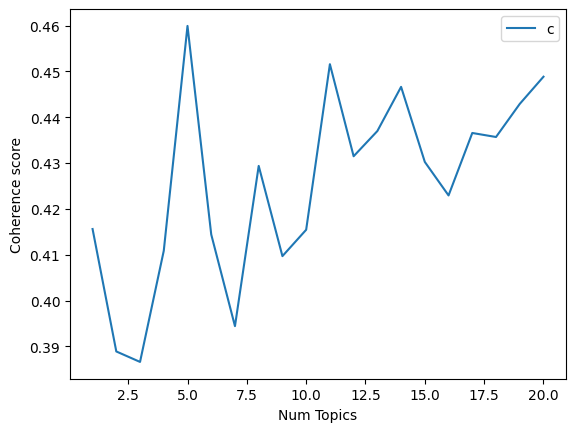

In [40]:
# call the function
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary,
                                                        corpus=corpus_tfidf,
                                                        texts=text_list,
                                                        start=start,
                                                        limit=limit,
                                                        step=step,
                                                        passes=10000,
                                                        iterations=10000,
                                                        random_state=42)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [41]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.415612
Num Topics = 2  has Coherence Value of 0.388895
Num Topics = 3  has Coherence Value of 0.386613
Num Topics = 4  has Coherence Value of 0.410865
Num Topics = 5  has Coherence Value of 0.459929
Num Topics = 6  has Coherence Value of 0.414422
Num Topics = 7  has Coherence Value of 0.394419
Num Topics = 8  has Coherence Value of 0.429387
Num Topics = 9  has Coherence Value of 0.409697
Num Topics = 10  has Coherence Value of 0.415449
Num Topics = 11  has Coherence Value of 0.451579
Num Topics = 12  has Coherence Value of 0.43149
Num Topics = 13  has Coherence Value of 0.436991
Num Topics = 14  has Coherence Value of 0.446633
Num Topics = 15  has Coherence Value of 0.430251
Num Topics = 16  has Coherence Value of 0.422941
Num Topics = 17  has Coherence Value of 0.436569
Num Topics = 18  has Coherence Value of 0.435692
Num Topics = 19  has Coherence Value of 0.442912
Num Topics = 20  has Coherence Value of 0.448847


## LDA Modelling

In [42]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5)
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.107*"bagus" + 0.058*"bantu" + 0.018*"manfaat" + 0.016*"mudah" + 0.015*"transaksi" + 0.013*"yg" + 0.012*"buka" + 0.011*"danamon" + 0.011*"susah" + 0.010*"transfer"
Topic: 1 Word: 0.139*"ok" + 0.022*"lengkap" + 0.015*"ribet" + 0.011*"yg" + 0.010*"dbank_pro" + 0.010*"dbank" + 0.010*"download" + 0.009*"nya" + 0.008*"muter" + 0.008*"mobile_banking"
Topic: 2 Word: 0.028*"keren" + 0.020*"ya" + 0.014*"buka" + 0.014*"nya" + 0.013*"ga" + 0.013*"dbank_pro" + 0.013*"yg" + 0.012*"masuk" + 0.011*"top" + 0.010*"gimana"
Topic: 3 Word: 0.084*"mantap" + 0.045*"good" + 0.038*"bank_pro" + 0.027*"mudah" + 0.017*"bank" + 0.014*"mudah_transaksi" + 0.013*"transaksi" + 0.013*"pro" + 0.013*"login" + 0.011*"gak"
Topic: 4 Word: 0.029*"oke" + 0.023*"update" + 0.022*"log_in" + 0.019*"lot" + 0.016*"suka" + 0.012*"error" + 0.011*"muas" + 0.010*"versi" + 0.010*"danamon" + 0.010*"yg"


Topic 0: User Experience
Words like "bagus" (good), "bantu" (helpful), "manfaat" (benefit), "mudah" (easy), and "transaksi" (transactions) suggest that this topic could be about positive feedback regarding the ease and benefits of using a service, possibly related to financial transactions.

Topic 1: App Features
Words like "lengkap" (comprehensive), "ribet" (complicated), "download," and "mobile_banking" indicate a discussion about app features and their usability. The topic might involve evaluating the app's ease of use and functionality.

Topic 2: Questions and Engagement
Words like "keren" (cool), "buka" (open), "gimana" (how), and "masuk" (enter) suggest that this topic revolves around questions, engagement, and possibly inquiries about app usage or features.

Topic 3: Opinion on Banking App
Words like "mantap" (solid), "good," "mudah" (easy), "transaksi" (transactions), and "login" indicate positive opinions about a banking app's convenience, ease of transactions, and login process.

Topic 4: Mixed Feedback and Technical Issues
Words like "update," "error," "versi" (version), and "danamon" (possibly a reference to a bank) point towards discussions about app updates, technical issues, and possibly mixed opinions about the app's performance.

In [43]:
# save top words
top_words_per_topic = []

for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])


new_df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
new_df.to_csv("top_words.csv", index=False)

print(new_df)

    Topic             Word         P
0       0            bagus  0.106657
1       0            bantu  0.058251
2       0          manfaat  0.018192
3       0            mudah  0.015753
4       0        transaksi  0.015115
5       0               yg  0.012994
6       0             buka  0.012192
7       0          danamon  0.010765
8       0            susah  0.010731
9       0         transfer  0.010190
10      1               ok  0.138654
11      1          lengkap  0.022414
12      1            ribet  0.014877
13      1               yg  0.010510
14      1        dbank_pro  0.009808
15      1            dbank  0.009730
16      1         download  0.009557
17      1              nya  0.008560
18      1            muter  0.008381
19      1   mobile_banking  0.007864
20      2            keren  0.027530
21      2               ya  0.020279
22      2             buka  0.014345
23      2              nya  0.014240
24      2               ga  0.013408
25      2        dbank_pro  0.012963
2

## Categorization Analysis

On this LDA Modelling we created 5 Main Topics from the dataset.

we use 5 topics because our coherence score is the highest with 5
the topics are :

0: 'User Experience'

1: 'App Features'

2: 'Questions and Engagement'
               
3: 'Opinion on Banking App'

4: 'Mixed Feedback and Technical Issues'

this 5 topics is determined by the weight of each topic

## Saving Model

In [44]:
model.save('/content/folder/lda.model') # save  model

dictionary.save('/content/folder/dictionary.dict') # save dictionary from  sentiment

MmCorpus.serialize('/content/folder/corpus_tfidf_pos.mm', corpus_tfidf) # save corpus from  sentiment

In [47]:
# Source folder path
source_folder_path = '/content/folder'

# Destination zip file path
zip_file_path = '/content/folder.zip'

# Create a zip file of the folder
shutil.make_archive(zip_file_path[:-4], 'zip', source_folder_path)

print(f"Folder '{source_folder_path}' zipped to '{zip_file_path}'")

Folder '/content/folder' zipped to '/content/folder.zip'


## Applying Categorization

### Load the trained LDA model and dictionary

In [48]:
#Load model
lda_model = LdaModel.load("/content/folder/lda.model")
dictionary = Dictionary.load("/content/folder/dictionary.dict")

In [49]:
topic_names = {0: 'User Experience',
               1: 'App Features',
               2: 'Questions and Engagement',
               3: 'Opinion on Banking App',
               4: 'Mixed Feedback and Technical Issues',
                }

In [50]:
# Function to perform inference and get the topic with the highest probability
def get_highest_probability_topic(lda_model, dictionary, new_document, topic_names):
    new_bow = dictionary.doc2bow(new_document.split())
    topic_distribution = lda_model.get_document_topics(new_bow, minimum_probability=0)

    highest_probability_topic = max(topic_distribution, key=lambda x: x[1])
    topic_id, probability = highest_probability_topic
    topic_name = topic_names.get(topic_id, f"Topic {topic_id}")

    return topic_name, probability

In [54]:
# Create an empty list to store the results
inferred_topics_list = []
inferred_probabilities_list = []

# Perform inference for each row in the DataFrame
for index, row in df_sen.iterrows():
    new_document = row['content_process']  

    inferred_topic, inferred_probability = get_highest_probability_topic(lda_model, dictionary, new_document, topic_names)
    inferred_topics_list.append(inferred_topic)
    inferred_probabilities_list.append(inferred_probability)

# Create new columns in the DataFrame to store the inferred topics and probabilities
df_sen['inferred_topic'] = inferred_topics_list
df_sen['inferred_probability'] = inferred_probabilities_list

# Save the updated DataFrame to a new CSV file
df_sen.to_csv("Sentiment_Topics_Danamon_Mobile_Banking.csv", index=False)

# Print the first few rows of the updated DataFrame
df_sen

Unnamed: 0                                            content  score  \
0              0  Bagus bisa membantu masyarakat , khususnya ttg...      5   
1              1                                    Sangat membantu      5   
2              2  Ini gimana sih? Kwkwkwk, udah daftar dan udah ...      3   
3              3                                                 Ok      5   
4              4  Knpa y kemaren ada potongan lagi dari prima Ba...      1   
...          ...                                                ...    ...   
6648        6648  Saya belum bisa aktivasi via kartu debit. Sela...      4   
6649        6649  Aplikasi Digital Banking yang lengkap dan user...      5   
6650        6650                                                 Ok      5   
6651        6651                                                 OK      5   
6652        6652                                      Lebih komplit      5   

     appVersion                                    content_process  \
0         1.4.1     bagus bantu masyarakat ttg produk bank danamon   
1         1.4.1                                              bantu   
2         1.4.1  gimana sih kwkwkwk udah daftar udah hasil suru...   
3         1.4.1                                                 ok   
4           NaN  knpa kemaren potong prima bank central asia ge...   
...         ...                                                ...   
6648      1.1.1  aktivasi via kartu debit muncul tulis terautor...   
6649      1.1.0     aplikasi digital banking lengkap user friendly   
6650        NaN                                                 ok   
6651        NaN                                                 ok   
6652   1.1.0.10                                            komplit   

                                                 result sentiment     proba  \
0     [{'label': 'positive', 'score': 0.996625304222...  positive  0.996625   
1     [{'label': 'positive', 'score': 0.995917260646...  positive  0.995917   
2     [{'label': 'negative', 'score': 0.998039305210...  negative  0.998039   
3     [{'label': 'negative', 'score': 0.998392641544...  negative  0.998393   
4     [{'label': 'neutral', 'score': 0.9930198788642...   neutral  0.993020   
...                                                 ...       ...       ...   
6648  [{'label': 'neutral', 'score': 0.9978173971176...   neutral  0.997817   
6649  [{'label': 'positive', 'score': 0.938863337039...  positive  0.938863   
6650  [{'label': 'negative', 'score': 0.998392641544...  negative  0.998393   
6651  [{'label': 'negative', 'score': 0.998392641544...  negative  0.998393   
6652  [{'label': 'negative', 'score': 0.987875640392...  negative  0.987876   

                           inferred_topic  inferred_probability  
0                         User Experience              0.702688  
1                         User Experience              0.599621  
2                Questions and Engagement              0.701136  
3                            App Features              0.599949  
4                Questions and Engagement              0.491112  
...                                   ...                   ...  
6648               Opinion on Banking App              0.729074  
6649                      User Experience              0.629211  
6650                         App Features              0.599949  
6651                         App Features              0.599949  
6652  Mixed Feedback and Technical Issues              0.599985  

[6653 rows x 10 columns]

### Visualization

In [55]:
# split dataframe into positive netral and negative section for visualization

pos = df_sen[(df_sen.sentiment == "positive")]
net = df_sen[(df_sen.sentiment == "neutral")]
neg = df_sen[(df_sen.sentiment == "negative")]

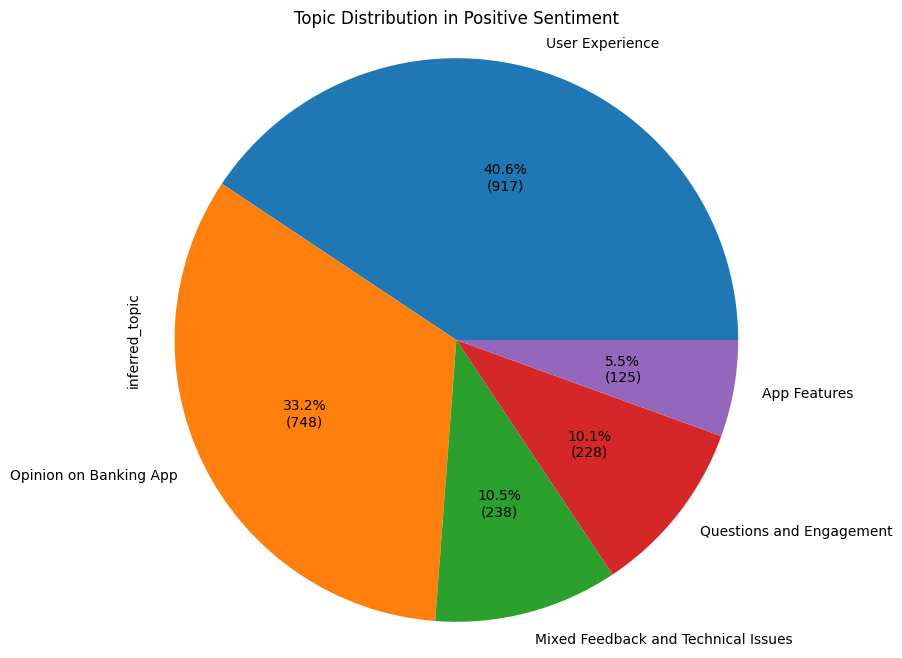

In [56]:
topic_pos = pos['inferred_topic'].value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.figure(figsize=(8, 8))
plt.title('Topic Distribution in Positive Sentiment')
topic_pos.plot.pie(subplots=True, autopct=autopct_format(topic_pos))
plt.axis('equal')
plt.show()

The most discussed topic in postive sentiment is about user experience

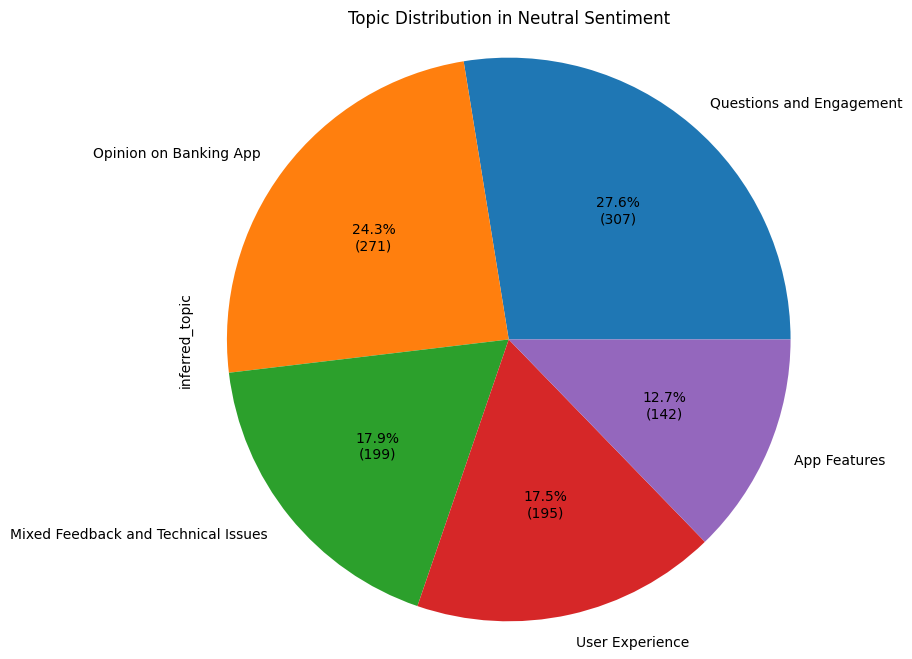

In [57]:
topic_net = net['inferred_topic'].value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.figure(figsize=(8, 8))
plt.title('Topic Distribution in Neutral Sentiment')
topic_net.plot.pie(subplots=True, autopct=autopct_format(topic_net))
plt.axis('equal')
plt.show()

The most discussed topic in neutral sentiment is about Questions and Engagement

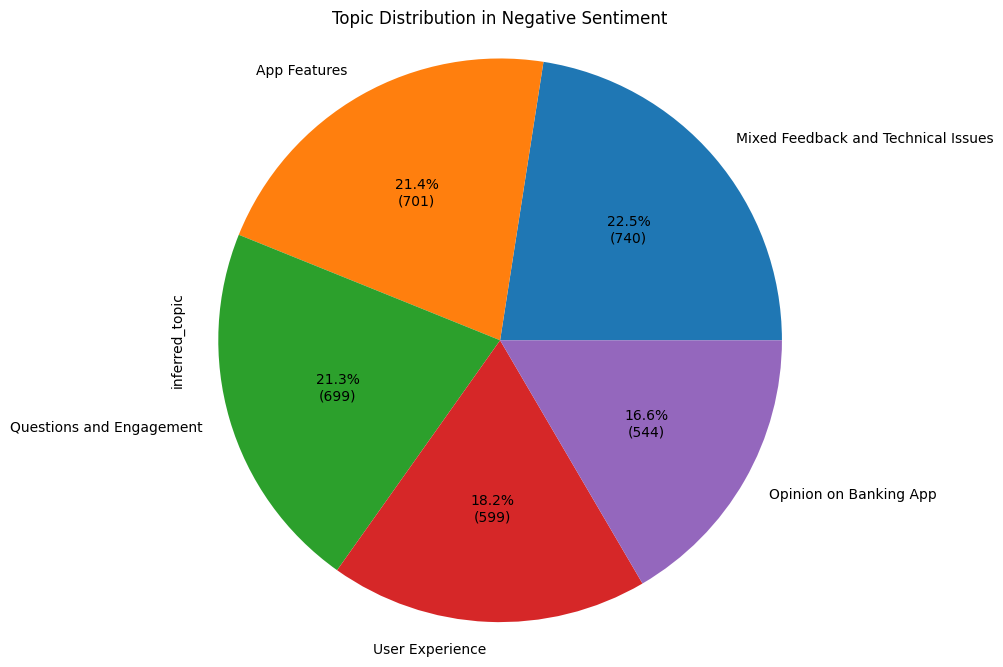

In [58]:
topic_neg = neg['inferred_topic'].value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.figure(figsize=(8, 8))
plt.title('Topic Distribution in Negative Sentiment')
topic_neg.plot.pie(subplots=True, autopct=autopct_format(topic_neg))
plt.axis('equal')
plt.show()

The most discussed topic in negative sentiment is about Mixed Feedback and Technical Issues

# Overall Analysis

What had we learn from our analysis is that :
1. Danamon Mobile banking had more review on negative sentiment than other sentiment 
2. The Model divided topics into 5 categories each topic can be on all sentiment 
3. Technical issue is the common problem from the negative sentiment 
4. On the negative sentiment the topic is envely diveded 